In [17]:
import pandas as pd
import numpy as np

data_train = pd.read_csv('T-R-train.csv')
data_test = pd.read_csv('T-R-test.csv')

data_train.head()

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


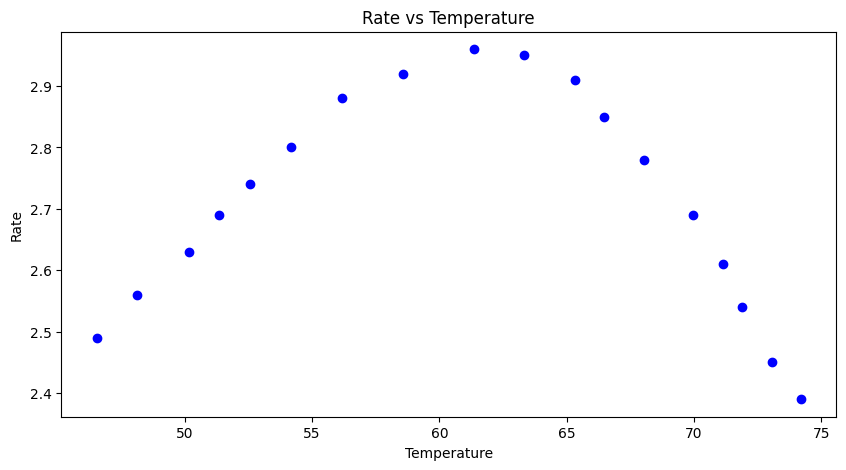

In [18]:
from matplotlib import pyplot as plt

x_train = data_train.loc[:, 'T']
y_train = data_train.loc[:, 'rate']

fig1 = plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color='blue')
plt.xlabel('Temperature')
plt.ylabel('Rate')
plt.title('Rate vs Temperature')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
x_train = x_train.values.reshape(-1, 1)
lr1.fit(x_train, y_train)

LinearRegression()

In [20]:
x_test = data_test.loc[:, 'T'].values.reshape(-1, 1)
y_test = data_test.loc[:, 'rate']

y_train_pred = lr1.predict(x_train)
y_test_pred = lr1.predict(x_test)

In [21]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('R2 score for training data:', r2_train)
print('R2 score for testing data:', r2_test)

R2 score for training data: 0.016665703886981964
R2 score for testing data: -0.758336343735132


In [22]:
x_range = np.linspace(40, 90, 300).reshape(-1, 1)
y_range_pred = lr1.predict(x_range)

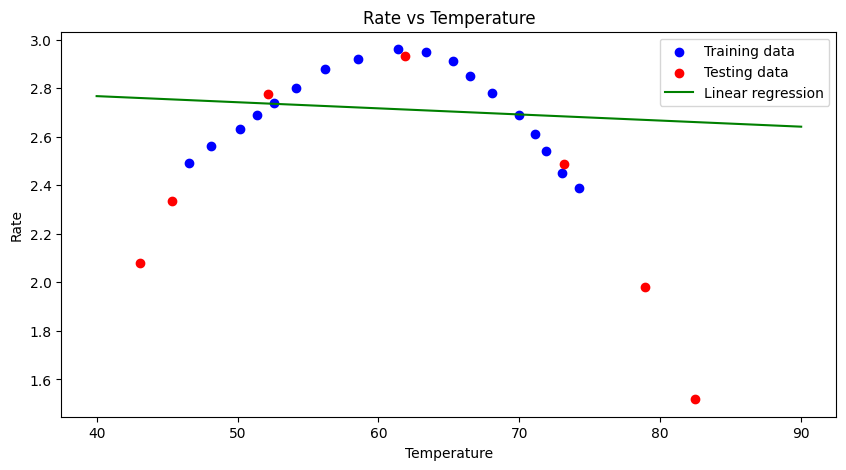

In [23]:
fig2 = plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Testing data')
plt.plot(x_range, y_range_pred, color='green', label='Linear regression')
plt.xlabel('Temperature')
plt.ylabel('Rate')
plt.title('Rate vs Temperature')
plt.legend()
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)

x_train_poly2[:5]
# x_test_poly2[:5]

array([[1.0000000e+00, 4.6530000e+01, 2.1650409e+03],
       [1.0000000e+00, 4.8140000e+01, 2.3174596e+03],
       [1.0000000e+00, 5.0150000e+01, 2.5150225e+03],
       [1.0000000e+00, 5.1360000e+01, 2.6378496e+03],
       [1.0000000e+00, 5.2570000e+01, 2.7636049e+03]])

In [25]:
lr2 = LinearRegression()
lr2.fit(x_train_poly2, y_train)

y_train_pred_poly2 = lr2.predict(x_train_poly2)
y_test_pred_poly2 = lr2.predict(x_test_poly2)

r2_train_poly2 = r2_score(y_train, y_train_pred_poly2)
r2_test_poly2 = r2_score(y_test, y_test_pred_poly2)

print('R2 score for training data:', r2_train_poly2)
print('R2 score for testing data:', r2_test_poly2)

R2 score for training data: 0.9700515400689432
R2 score for testing data: 0.996395455646867


In [26]:
x_range_poly2 = poly2.transform(x_range)
y_range_pred_poly2 = lr2.predict(x_range_poly2)

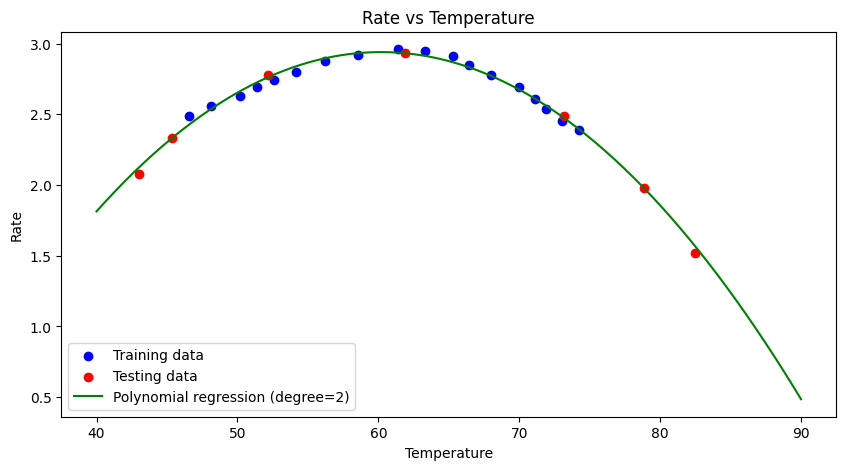

In [27]:
fig3 = plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Testing data')
plt.plot(x_range, y_range_pred_poly2, color='green', label='Polynomial regression (degree=2)')
plt.xlabel('Temperature')
plt.ylabel('Rate')
plt.title('Rate vs Temperature')
plt.legend()
plt.show()

In [28]:
poly5 = PolynomialFeatures(degree=5)
x_train_poly5 = poly5.fit_transform(x_train)
x_test_poly5 = poly5.transform(x_test)

In [30]:
lr5 = LinearRegression()
lr5.fit(x_train_poly5, y_train)

y_train_pred_poly5 = lr5.predict(x_train_poly5)
y_test_pred_poly5 = lr5.predict(x_test_poly5)

r2_train_poly5 = r2_score(y_train, y_train_pred_poly5)
r2_test_poly5 = r2_score(y_test, y_test_pred_poly5)

print('R2 score for training data:', r2_train_poly5)
print('R2 score for testing data:', r2_test_poly5)

R2 score for training data: 0.9978527267154614
R2 score for testing data: 0.5437832506091483


In [31]:
x_range_poly5 = poly5.transform(x_range)
y_range_pred_poly5 = lr5.predict(x_range_poly5)


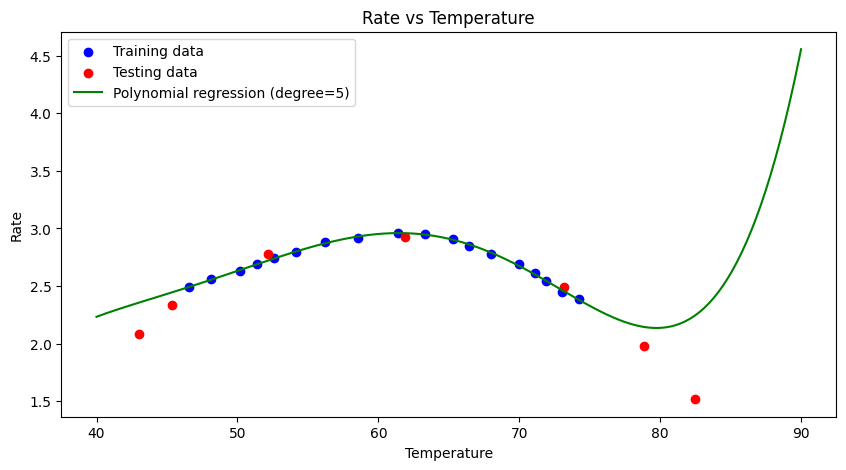

In [32]:
fig4 = plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Testing data')
plt.plot(x_range, y_range_pred_poly5, color='green', label='Polynomial regression (degree=5)')
plt.xlabel('Temperature')
plt.ylabel('Rate')
plt.title('Rate vs Temperature')
plt.legend()
plt.show()